# **Bionformatics Project**
# Notebook 2

This is the second of two notebooks that contains Part 3 and Part 4 of the project on HDAC inhibitors.

# **Part 3 Descriptor Calculation and Dataset Preparation**

In **Part 3**, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

---

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-02-11 13:02:42--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-02-11 13:02:43--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M   142MB/s    in 0.2s    

2022-02-11 13:02:43 (142 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2022-02-11 13:02:43--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **HDAC_04_bioactivity_data_3class_pIC50.csv** file that contains the pIC50 values that we will be using for building a regression model.

In [ ]:
df3 = pd.read_csv('HDAC_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL112539,inactive,NNC(=O)NCCCCCC(=O)Nc1ccccc1,264.329,1.3584,4.0,3.0,3.823909
1,1,CHEMBL136792,inactive,NNC(=O)NCCCCC(=O)Nc1ccccc1,250.302,0.9683,4.0,3.0,3.000000
2,2,CHEMBL137003,inactive,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,316.323,3.2541,2.0,2.0,4.000000
3,3,CHEMBL98,active,O=C(CCCCCCC(=O)Nc1ccccc1)NO,264.325,2.4711,3.0,3.0,6.552842
4,4,CHEMBL264784,inactive,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,296.414,3.1440,1.0,2.0,4.000000
...,...,...,...,...,...,...,...,...,...
2357,2357,CHEMBL4637992,active,CN(C)S(=O)(=O)c1ccc(NCCCCCC(=O)NO)c2nonc12,371.419,0.9508,3.0,8.0,6.688246
2358,2358,CHEMBL4647479,active,CN(C)S(=O)(=O)c1ccc(NCCCCCCC(=O)NO)c2nonc12,385.446,1.3409,3.0,8.0,6.962574
2359,2359,CHEMBL4644623,intermediate,CN(C)S(=O)(=O)c1ccc(NCCCCCNC(=O)NCC(=O)NO)c2no...,443.486,-0.1401,5.0,9.0,5.120331
2360,2360,CHEMBL4636091,inactive,CC(C)CC(NC(=O)NCCCCCNc1ccc(S(=O)(=O)N(C)C)c2no...,499.594,1.2746,5.0,9.0,4.000000


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id'] # select only canonical smiles and chembl ID
df3_selection = df3[selection] # gets these columns 
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh
# removesalt removes Na and Cl salts from chemical structures and also small organic acids, cleaning chemical structure so there is no impurity

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL112539 in molecule.smi (1/2362). 
Processing CHEMBL136792 in molecule.smi (2/2362). 
Processing CHEMBL137003 in molecule.smi (3/2362). Average speed: 3.32 s/mol.
Processing CHEMBL98 in molecule.smi (4/2362). Average speed: 1.70 s/mol.
Processing CHEMBL264784 in molecule.smi (5/2362). Average speed: 1.28 s/mol.
Processing CHEMBL344475 in molecule.smi (6/2362). Average speed: 1.01 s/mol.
Processing CHEMBL136992 in molecule.smi (7/2362). Average speed: 0.88 s/mol.
Processing CHEMBL137216 in molecule.smi (8/2362). Average speed: 0.92 s/mol.
Processing CHEMBL137278 in molecule.smi (9/2362). Average speed: 0.72 s/mol.
Processing CHEMBL137036 in molecule.smi (10/2362). Average speed: 0.64 s/mol.
Processing CHEMBL341701 in molecule.smi (11/2362). Average speed: 0.62 s/mol.
Processing CHEMBL138381 in molecule.smi (12/2362). Average speed: 0.56 s/mol.
Processing CHEMBL422460 in molecule.smi (13/2362). Average speed: 0.54 s/mol.
Processing CHEMBL137333 in molecule.smi (14/2362). 

## **Preparing the X and Y Data Matrices**

### **X data matrix**
- comprised of molecular descriptors which are the Pubchem fingerprints

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL136792,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL112539,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL98,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL137003,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL264784,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,CHEMBL4637992,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2358,CHEMBL4647479,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2359,CHEMBL4644623,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2360,CHEMBL4636091,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop name column so you only have molecular features 
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2358,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2359,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2360,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Target variable, y**

### **Get pIC50 column**

In [ ]:
# y variable is the pIC50 column from the original df
df3_Y = df3['pIC50']
df3_Y

0       3.823909
1       3.000000
2       4.000000
3       6.552842
4       4.000000
          ...   
2357    6.688246
2358    6.962574
2359    5.120331
2360    4.000000
2361    4.142668
Name: pIC50, Length: 2362, dtype: float64

## **Combining X and y**

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.823909
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.552842
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.688246
2358,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.962574
2359,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.120331
2360,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000


In [ ]:
# output dataset3 df to a csv file 
# file format is: targetprotein_sequentialordernumber_data_info_containingPubchemfingerprint
# Padel allows you to compute more than 10 fingerprint types, so can compute others
dataset3.to_csv('HDAC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# **Part 4 Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of HDAC inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## **2. Load the data set**

In [ ]:
df = pd.read_csv('HDAC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df.shape

(2362, 882)

## **3. Input features**
The ***HDAC*** data set contains 881 input features and 1 output variable (pIC50 values).
- The unique fingerprint of each molecule will allow the ML algorithm to learn from the unqiue molecular properties of the compound and create a model that will predict the pIC50 value 
- We want to see which functional group or  fingerprint is essential for designing a good/potent drug 
- The target variable is pIC50 which is the -log of the IC50 value


### **3.1. Input features**

In [ ]:
# need to drop pIC50 as it will be used as y 
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2358,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2359,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2360,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
y = df.pIC50
y

0       3.823909
1       3.000000
2       4.000000
3       6.552842
4       4.000000
          ...   
2357    6.688246
2358    6.962574
2359    5.120331
2360    4.000000
2361    4.142668
Name: pIC50, Length: 2362, dtype: float64

### **3.3. Examine the data dimensions**

In [ ]:
X.shape

(2362, 881)

Have 4695 compounds and 881 Pubchem fingerprints (variables)

In [ ]:
y.shape

(2362,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold= (0.8* (1-0.8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(2362, 139)

Went from 881 to 139 features (Pubchem fingerprints). The features with low variance were removed.

## **4. Data split (80/20 ratio)**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
X_train.shape, y_train.shape

((1889, 139), (1889,))

In [67]:
X_test.shape, y_test.shape

((473, 139), (473,))

## **5. Building a Regression Model using Random Forest**

### **Cross-validation**

In [68]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=500, random_state=42)
cv_r_squared = cross_val_score(rf, X_train, y_train, cv=5)
cv_r_squared


array([0.53827072, 0.52357885, 0.48335168, 0.49221993, 0.53965954])

In [69]:
cv_mean = cv_r_squared.mean()
cv_mean

0.5154161444880007

In [70]:
model_name = pd.Series(['Random forest'], name='Name')
cv_series = pd.Series(cv_mean, name='Mean cross-validation r^2')

performance_metrics = pd.concat([model_name, cv_series], axis=1)
performance_metrics

,Name,Mean cross-validation r^2
0,Random forest,0.515416


### **Obtain test $R^2$ and $RMSE$**

In [71]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

0.5385378508932923

In [72]:
y_hat = model.predict(X_test)

In [73]:
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print('Root of the mean squared error: %.2f'% RMSE)

Root of the mean squared error: 0.87


In [74]:
fp_type = 'Substructure'

In [75]:
model_name = pd.Series(['Random forest'], name='Name')
finger_print = pd.Series(['PubChem'], name='Fingerprint')
r_squared = pd.Series(r2, name='R2')
rmse = pd.Series(RMSE, name='RMSE')

performance_metrics = pd.concat([model_name, finger_print, r_squared, rmse], axis=1)
performance_metrics

,Name,Fingerprint,R2,RMSE
0,Random forest,PubChem,0.538538,0.870513


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

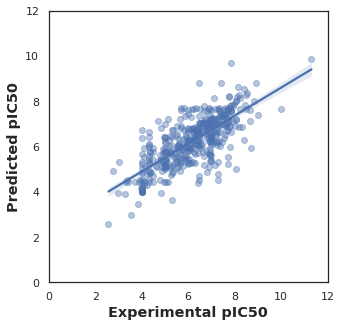

In [76]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_hat, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Conclusion

The generated model yeilds an $R^2$ value of $0.52$ and $0.54$ for the 5-fold cross-validated set and test set, respectively. This means that the PubChem fingerprints are able to explain approximately $52\%$ of the varaince in the pIC50 value of compounds. Furthermore, an $RMSE$ value of $0.87$ was obtained for the test set, meaning that on average, the pIC50 value of compounds in the test set differed by ± $0.87$ to their actual pIC50 value. Taken together we can infer that PubChem fingerprints could be used to moderately inform drug design of HDAC inhibitors. 